In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import itertools
import warnings


df = pd.read_csv('Data_MASQLong.csv')

warnings.filterwarnings('ignore')
df.head()


,ID,Age_T1,Gender,Edu_T1,MH_Diag_T1,MASQDG_mean_T1,MASQAN_mean_T1,MASQ_ANH_mean_T1,MASQDG_sum_T1,MASQAN_sum_T1,...,MASQAN_sum_T3,MASQ_ANH_sum_T3,Age_T4,MASQ_ANH_mean_T4,MASQDG_mean_T4,MASQAN_mean_T4,MASQDG_sum_T4,MASQAN_sum_T4,MASQ_ANH_sum_T4,Age_T1_group
0,1,19,2.0,1,2,1.125,2.0,2.375,9,20,...,11,18,19,2.500,1.500,1.2,12,12,20,17-20
1,2,20,1.0,1,2,2.750,1.6,3.750,22,16,...,19,22,20,4.000,2.125,1.2,17,12,32,17-20
2,5,23,1.0,1,1,1.500,1.1,2.000,12,11,...,12,19,24,3.125,1.875,1.7,15,17,25,>23
3,6,24,2.0,3,2,4.000,1.6,3.750,32,16,...,24,25,25,4.125,3.250,1.1,26,11,33,>23
4,7,19,1.0,1,2,1.500,1.0,2.500,12,10,...,10,26,20,4.000,2.875,1.0,23,10,32,17-20


In [2]:
df.describe()

,ID,Age_T1,Gender,Edu_T1,MH_Diag_T1,MASQDG_mean_T1,MASQAN_mean_T1,MASQ_ANH_mean_T1,MASQDG_sum_T1,MASQAN_sum_T1,...,MASQDG_sum_T3,MASQAN_sum_T3,MASQ_ANH_sum_T3,Age_T4,MASQ_ANH_mean_T4,MASQDG_mean_T4,MASQAN_mean_T4,MASQDG_sum_T4,MASQAN_sum_T4,MASQ_ANH_sum_T4
count,231.000000,231.000000,229.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,...,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,162.025974,21.943723,1.305677,1.350649,1.774892,2.274505,1.772872,2.800788,18.147186,17.653680,...,16.112554,16.536797,21.402597,22.480519,3.083473,2.294939,1.666522,18.259740,16.606061,24.610390
std,113.908656,4.109516,0.461703,0.814535,0.418561,1.042252,0.831725,0.770622,8.324661,8.215652,...,7.667286,7.433016,5.838984,4.142916,0.774055,0.986329,0.731156,7.858093,7.318574,6.246716
min,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,9.000000,...,7.000000,9.000000,8.000000,18.000000,1.125000,1.000000,1.000000,7.000000,6.000000,9.000000
25%,71.500000,20.000000,1.000000,1.000000,2.000000,1.375000,1.100000,2.250000,11.000000,11.000000,...,10.000000,11.000000,17.000000,20.000000,2.500000,1.500000,1.100000,12.000000,11.000000,20.000000
50%,146.000000,21.000000,1.000000,1.000000,2.000000,2.000000,1.500000,2.750000,16.000000,15.000000,...,14.000000,14.000000,21.000000,21.000000,3.125000,2.000000,1.400000,16.000000,14.000000,25.000000
75%,217.500000,22.000000,2.000000,1.000000,2.000000,3.000000,2.100000,3.375000,24.000000,21.000000,...,20.500000,20.000000,25.000000,23.000000,3.687500,3.000000,2.000000,24.000000,20.000000,29.500000
max,515.000000,44.000000,2.000000,5.000000,2.000000,5.000000,4.700000,5.000000,40.000000,47.000000,...,39.000000,45.000000,39.000000,44.000000,4.875000,5.000000,4.600000,40.000000,46.000000,39.000000


-------

### Task 1:

Analyze two variables:

    1)Extra_T1
    2)MASQAN_sum_T1

Select appropriate tests to check if there is a difference in values of each variable in the following groups:

    a.People with and without mental health disorder diagnosis (MH_Diag_T1)
    b.Males and females (Gender)
    c.People of different age groups (Age_T1_group)


In [3]:
# 1.a анализ для Extra_T1 и People with and without mental health disorder diagnosis (MH_Diag_T1)

# Читаемые метки
df['MH_Diag_T1_label'] = df['MH_Diag_T1'].map({1: 'Mental_health_diagnosis', 2: 'No_mental_health_diagnosis'})

var = 'Extra_T1'
group_col = 'MH_Diag_T1_label'
data = df[[var, group_col]].dropna()

print("=== Анализ переменной:", var, "по группировке:", group_col, "===\n")

# 1) Описательная статистика
desc = data.groupby(group_col)[var].agg(['count', 'mean', 'median', 'std', 'min', 'max', 'skew']).rename(columns={'count':'n','std':'sd'})
iqr = data.groupby(group_col)[var].quantile([0.25, 0.75]).unstack(level=1).rename(columns={0.25:'Q1',0.75:'Q3'})
desc = desc.join(iqr)
desc['IQR'] = desc['Q3'] - desc['Q1']
print("1) Описательная статистика по группам (n, mean, median, sd, IQR):\n")
print(desc[['n','mean','median','sd','Q1','Q3','IQR']].to_string())
print("\n(Примечание: смотрим на n — маленькие n снижают надёжность тестов; IQR и медиана полезны при нарушении нормальности.)\n")

alpha = 0.05

# 2) Тест нормальности (Shapiro-Wilk) для каждой группы
print("2) Тест нормальности (Shapiro-Wilk) по группам:")
shapiro_p = {}
for g, sub in data.groupby(group_col):
    vals = sub[var].values
    if len(vals) >= 3:
        stat, p = stats.shapiro(vals if len(vals)<=5000 else np.random.choice(vals, 5000, replace=False))
        shapiro_p[g] = p
        print(f"   Группа {g}: n={len(vals)}, W={stat:.4f}, p={p:.4f} ->", 
              "Нормальность не отвергается" if p>alpha else "Нормальность отвергается")
    else:
        shapiro_p[g] = np.nan
        print(f"   Группа {g}: n={len(vals)} < 3 — Shapiro не проводится")

print("\n(Интерпретация: если обе группы не отвергают нормальность, можно рассмотреть параметрические тесты; иначе — непараметрические.)\n")

# 3) Тест однородности дисперсий (Levene)
groups_values = [group[var].values for name, group in data.groupby(group_col)]
if len(groups_values) >= 2:
    lev_stat, lev_p = stats.levene(*groups_values, center='median')
    print(f"3) Levene (гомогенность дисперсий): stat={lev_stat:.4f}, p={lev_p:.4f} ->", 
          "Дисперсии однородны (можно t-test с equal_var=True)" if lev_p>alpha else "Дисперсии НЕ однородны (используйте Welch t-test или непараметрический тест)")
else:
    lev_p = np.nan
    print("3) Levene: недостаточно групп для теста")

print("\n(Примечание: Levene с center='median' более устойчив к выбросам.)\n")

# 4) Выбор теста (две независимые группы)
groups = sorted(list(data[group_col].unique()))
if len(groups) != 2:
    raise ValueError("Ожидалось ровно 2 группы в столбце " + group_col)
g1, g2 = groups[0], groups[1]
vals1 = data.loc[data[group_col]==g1, var].values
vals2 = data.loc[data[group_col]==g2, var].values

normal1 = (not np.isnan(shapiro_p[g1])) and (shapiro_p[g1] > alpha)
normal2 = (not np.isnan(shapiro_p[g2])) and (shapiro_p[g2] > alpha)

print("4) Выбор теста на основе проверок предпосылок:")
if normal1 and normal2:
    # параметрический путь
    equal_var = (not np.isnan(lev_p)) and (lev_p > alpha)
    tstat, pval = stats.ttest_ind(vals1, vals2, equal_var=equal_var)
    test_used = f"Independent t-test (Welch if equal_var=False): equal_var={equal_var}"
    # Cohen's d (pooled SD)
    n1, n2 = len(vals1), len(vals2)
    s1, s2 = np.std(vals1, ddof=1), np.std(vals2, ddof=1)
    pooled_sd = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1 + n2 - 2)) if (n1 + n2 - 2)>0 else np.nan
    cohen_d = (np.mean(vals1) - np.mean(vals2)) / pooled_sd if pooled_sd>0 else np.nan
    # 95% CI для разницы средних (используем Welch df при unequal var)
    mean_diff = np.mean(vals1) - np.mean(vals2)
    se_diff = np.sqrt(s1**2/n1 + s2**2/n2)
    # Welch-Satterthwaite df
    num = (s1**2/n1 + s2**2/n2)**2
    den = (s1**4)/((n1**2)*(n1-1)) + (s2**4)/((n2**2)*(n2-1))
    df_welch = num/den if den>0 else (n1 + n2 - 2)
    tcrit = stats.t.ppf(1 - alpha/2, df_welch)
    ci_low = mean_diff - tcrit * se_diff
    ci_high = mean_diff + tcrit * se_diff
    print(f"   Оба распределения похожи на нормальные -> используем t-test. {test_used}")
    print(f"   t = {tstat:.4f}, p = {pval:.6f}")
    print(f"   Разница средних (mean({g1}) - mean({g2})) = {mean_diff:.4f}")
    print(f"   95% CI для разницы средних ≈ [{ci_low:.4f}, {ci_high:.4f}] (df≈{df_welch:.1f})")
    print(f"   Cohen's d = {cohen_d:.3f} ->", end=" ")
    if abs(cohen_d) < 0.2:
        print("очень маленький/незначительный эффект")
    elif abs(cohen_d) < 0.5:
        print("малый эффект")
    elif abs(cohen_d) < 0.8:
        print("умеренный эффект")
    else:
        print("большой эффект")
else:
    # непараметрический путь
    ustat, pval = stats.mannwhitneyu(vals1, vals2, alternative='two-sided')
    test_used = "Mann-Whitney U (непараметрический)"
    n1, n2 = len(vals1), len(vals2)
    mean_u = n1 * n2 / 2
    sd_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (ustat - mean_u) / sd_u if sd_u>0 else 0
    r = z / np.sqrt(n1 + n2)
    med_diff = np.median(vals1) - np.median(vals2)
    print(f"   По крайней мере в одной группе нормальность не выполняется -> используем Mann-Whitney.")
    print(f"   U = {ustat:.4f}, p = {pval:.6f}")
    print(f"   Медианная разница (median({g1}) - median({g2})) = {med_diff:.4f}")
    print(f"   Приближение эффекта: rank-biserial (r) ≈ {abs(r):.3f} ->", end=" ")
    if abs(r) < 0.1:
        print("очень маленький эффект")
    elif abs(r) < 0.3:
        print("малый эффект")
    elif abs(r) < 0.5:
        print("умеренный эффект")
    else:
        print("большой эффект")

# 5) Итоговая интерпретация решения
print("\n5) Итоговая интерпретация (руководство по чтению результата):")
if pval < alpha:
    # определить направление: по средним и медианам
    mean1, mean2 = np.mean(vals1), np.mean(vals2)
    med1, med2 = np.median(vals1), np.median(vals2)
    direction = f"Значение {var} выше в группе {g1}" if mean1 > mean2 else f"Значение {var} выше в группе {g2}"
    print(f"   p = {pval:.6f} < {alpha} -> отвергаем H0. Есть статистически значимая разница между группами.")
    print(f"   По средним: mean({g1}) = {mean1:.3f}, mean({g2}) = {mean2:.3f}. {direction}.")
    print("   Проверьте размер эффекта (см. выше): p-value сообщает о статистической значимости, эффект показывает практическую значимость.")
else:
    print(f"   p = {pval:.6f} >= {alpha} -> нет достаточно доказательств, чтобы утверждать про различие между группами.")
    print("   Это НЕ доказывает равенство групп, а показывает отсутствие статистически значимой разницы при текущих данных и выбранной мощности теста.")




=== Анализ переменной: Extra_T1 по группировке: MH_Diag_T1_label ===

1) Описательная статистика по группам (n, mean, median, sd, IQR):

                              n      mean    median        sd        Q1        Q3       IQR
MH_Diag_T1_label                                                                           
Mental_health_diagnosis      52  3.042697  3.091665  0.674209  2.580553  3.528525  0.947973
No_mental_health_diagnosis  179  3.298335  3.291670  0.461639  2.968055  3.629665  0.661610

(Примечание: смотрим на n — маленькие n снижают надёжность тестов; IQR и медиана полезны при нарушении нормальности.)

2) Тест нормальности (Shapiro-Wilk) по группам:
   Группа Mental_health_diagnosis: n=52, W=0.9673, p=0.1615 -> Нормальность не отвергается
   Группа No_mental_health_diagnosis: n=179, W=0.9904, p=0.2720 -> Нормальность не отвергается

(Интерпретация: если обе группы не отвергают нормальность, можно рассмотреть параметрические тесты; иначе — непараметрические.)

3) Levene (

In [4]:
# 2.a анализ для MASQAN_sum_T1 и People with and without mental health disorder diagnosis (MH_Diag_T1)



# Метки для читаемости
df['MH_Diag_T1_label'] = df['MH_Diag_T1'].map({1: 'Mental_health_diagnosis', 2: 'No_mental_health_diagnosis'})

var = 'MASQAN_sum_T1'
group_col = 'MH_Diag_T1_label'
data = df[[var, group_col]].dropna()

print("=== Анализ переменной:", var, "по группировке:", group_col, "===\n")

# 1) Описательная статистика
desc = data.groupby(group_col)[var].agg(['count', 'mean', 'median', 'std', 'min', 'max', 'skew']).rename(columns={'count':'n','std':'sd'})
iqr = data.groupby(group_col)[var].quantile([0.25, 0.75]).unstack(level=1).rename(columns={0.25:'Q1',0.75:'Q3'})
desc = desc.join(iqr)
desc['IQR'] = desc['Q3'] - desc['Q1']
print("1) Описательная статистика по группам (n, mean, median, sd, Q1, Q3, IQR):\n")
print(desc[['n','mean','median','sd','Q1','Q3','IQR']].to_string())
print("\n(Примечание: смотрим на n — маленькие n снижают надёжность тестов; IQR и медиана полезны при нарушении нормальности.)\n")

alpha = 0.05

# 2) Shapiro-Wilk нормальности по группам
print("2) Тест нормальности (Shapiro-Wilk) по группам:")
shapiro_p = {}
for g, sub in data.groupby(group_col):
    vals = sub[var].values
    if len(vals) >= 3:
        stat, p = stats.shapiro(vals if len(vals)<=5000 else np.random.choice(vals, 5000, replace=False))
        shapiro_p[g] = p
        print(f"   Группа {g}: n={len(vals)}, W={stat:.4f}, p={p:.4f} ->", 
              "Нормальность не отвергается" if p>alpha else "Нормальность отвергается")
    else:
        shapiro_p[g] = np.nan
        print(f"   Группа {g}: n={len(vals)} < 3 — Shapiro не проводится")

print("\n(Интерпретация: если обе группы не отвергают нормальность, можно рассмотреть параметрические тесты; иначе — непараметрические.)\n")

# 3) Levene для гомогенности дисперсий
groups_values = [group[var].values for name, group in data.groupby(group_col)]
if len(groups_values) >= 2:
    lev_stat, lev_p = stats.levene(*groups_values, center='median')
    print(f"3) Levene (гомогенность дисперсий): stat={lev_stat:.4f}, p={lev_p:.4f} ->", 
          "Дисперсии однородны" if lev_p>alpha else "Дисперсии НЕ однородны")
else:
    lev_p = np.nan
    print("3) Levene: недостаточно групп для теста")

print("\n(Примечание: Levene с center='median' более устойчив к выбросам.)\n")

# 4) Выбор теста и расчёт эффекта
groups = sorted(list(data[group_col].unique()))
if len(groups) != 2:
    raise ValueError("Ожидалось ровно 2 группы в столбце " + group_col)
g1, g2 = groups[0], groups[1]
vals1 = data.loc[data[group_col]==g1, var].values
vals2 = data.loc[data[group_col]==g2, var].values

normal1 = (not np.isnan(shapiro_p[g1])) and (shapiro_p[g1] > alpha)
normal2 = (not np.isnan(shapiro_p[g2])) and (shapiro_p[g2] > alpha)

print("4) Выбор теста на основе проверок предпосылок:")
if normal1 and normal2:
    equal_var = (not np.isnan(lev_p)) and (lev_p > alpha)
    tstat, pval = stats.ttest_ind(vals1, vals2, equal_var=equal_var)
    test_used = f"Independent t-test (Welch if equal_var=False): equal_var={equal_var}"
    # Cohen's d
    n1, n2 = len(vals1), len(vals2)
    s1, s2 = np.std(vals1, ddof=1), np.std(vals2, ddof=1)
    pooled_sd = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1 + n2 - 2)) if (n1 + n2 - 2)>0 else np.nan
    cohen_d = (np.mean(vals1) - np.mean(vals2)) / pooled_sd if pooled_sd>0 else np.nan
    # CI for diff of means (Welch df if needed)
    mean_diff = np.mean(vals1) - np.mean(vals2)
    se_diff = np.sqrt(s1**2/n1 + s2**2/n2)
    num = (s1**2/n1 + s2**2/n2)**2
    den = (s1**4)/((n1**2)*(n1-1)) + (s2**4)/((n2**2)*(n2-1))
    df_welch = num/den if den>0 else (n1 + n2 - 2)
    tcrit = stats.t.ppf(1 - alpha/2, df_welch)
    ci_low = mean_diff - tcrit * se_diff
    ci_high = mean_diff + tcrit * se_diff
    print(f"   Оба распределения похожи на нормальные -> используем t-test. {test_used}")
    print(f"   t = {tstat:.4f}, p = {pval:.6f}")
    print(f"   Разница средних (mean({g1}) - mean({g2})) = {mean_diff:.4f}")
    print(f"   95% CI для разницы средних ≈ [{ci_low:.4f}, {ci_high:.4f}] (df≈{df_welch:.1f})")
    print(f"   Cohen's d = {cohen_d:.3f} ->", end=" ")
    if abs(cohen_d) < 0.2:
        print("очень маленький/незначительный эффект")
    elif abs(cohen_d) < 0.5:
        print("малый эффект")
    elif abs(cohen_d) < 0.8:
        print("умеренный эффект")
    else:
        print("большой эффект")
else:
    ustat, pval = stats.mannwhitneyu(vals1, vals2, alternative='two-sided')
    test_used = "Mann-Whitney U (непараметрический)"
    n1, n2 = len(vals1), len(vals2)
    mean_u = n1 * n2 / 2
    sd_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (ustat - mean_u) / sd_u if sd_u>0 else 0
    r = z / np.sqrt(n1 + n2)
    med_diff = np.median(vals1) - np.median(vals2)
    print(f"   По крайней мере в одной группе нормальность не выполняется -> используем Mann-Whitney.")
    print(f"   U = {ustat:.4f}, p = {pval:.6f}")
    print(f"   Медианная разница (median({g1}) - median({g2})) = {med_diff:.4f}")
    print(f"   Приближение эффекта: rank-biserial (r) ≈ {abs(r):.3f} ->", end=" ")
    if abs(r) < 0.1:
        print("очень маленький эффект")
    elif abs(r) < 0.3:
        print("малый эффект")
    elif abs(r) < 0.5:
        print("умеренный эффект")
    else:
        print("большой эффект")

# 5) Итоговая интерпретация
print("\n5) Итоговая интерпретация (руководство по чтению результата):")
if pval < alpha:
    mean1, mean2 = np.mean(vals1), np.mean(vals2)
    med1, med2 = np.median(vals1), np.median(vals2)
    direction = f"Значение {var} выше в группе {g1}" if mean1 > mean2 else f"Значение {var} выше в группе {g2}"
    print(f"   p = {pval:.6f} < {alpha} -> отвергаем H0. Есть статистически значимая разница между группами.")
    print(f"   По средним: mean({g1}) = {mean1:.3f}, mean({g2}) = {mean2:.3f}. {direction}.")
    print("   Проверьте размер эффекта (см. выше): p-value сообщает о статистической значимости, эффект показывает практическую значимость.")
else:
    print(f"   p = {pval:.6f} >= {alpha} -> нет достаточно доказательств, чтобы утверждать про различие между группами.")
    print("   Это НЕ доказывает равенство групп, а показывает отсутствие статистически значимой разницы при текущих данных и выбранной мощности теста.")


=== Анализ переменной: MASQAN_sum_T1 по группировке: MH_Diag_T1_label ===

1) Описательная статистика по группам (n, mean, median, sd, Q1, Q3, IQR):

                              n       mean  median        sd    Q1    Q3   IQR
MH_Diag_T1_label                                                              
Mental_health_diagnosis      52  22.538462    19.0  10.02636  14.0  31.0  17.0
No_mental_health_diagnosis  179  16.234637    14.0   7.02969  11.0  18.0   7.0

(Примечание: смотрим на n — маленькие n снижают надёжность тестов; IQR и медиана полезны при нарушении нормальности.)

2) Тест нормальности (Shapiro-Wilk) по группам:
   Группа Mental_health_diagnosis: n=52, W=0.9131, p=0.0011 -> Нормальность отвергается
   Группа No_mental_health_diagnosis: n=179, W=0.8178, p=0.0000 -> Нормальность отвергается

(Интерпретация: если обе группы не отвергают нормальность, можно рассмотреть параметрические тесты; иначе — непараметрические.)

3) Levene (гомогенность дисперсий): stat=17.3253, p=0.00

In [5]:
# 1.b анализ для Extra_T1 и Males and females (Gender)


# Маппинг пола (1-Female, 2-Male)
df['Gender_label'] = df['Gender'].map({1: 'Female', 2: 'Male'})

var = 'Extra_T1'
group_col = 'Gender_label'
data = df[[var, group_col]].dropna()

print("=== Анализ переменной:", var, "по группировке:", group_col, "===\n")

# 1) Описательная статистика
desc = data.groupby(group_col)[var].agg(['count', 'mean', 'median', 'std', 'min', 'max', 'skew']).rename(columns={'count':'n','std':'sd'})
iqr = data.groupby(group_col)[var].quantile([0.25, 0.75]).unstack(level=1).rename(columns={0.25:'Q1',0.75:'Q3'})
desc = desc.join(iqr)
desc['IQR'] = desc['Q3'] - desc['Q1']
print("1) Описательная статистика по группам (n, mean, median, sd, Q1, Q3, IQR):\n")
print(desc[['n','mean','median','sd','Q1','Q3','IQR']].to_string())
print("\n(Примечание: смотрим на n — маленькие n снижают надёжность тестов; IQR и медиана полезны при нарушении нормальности.)\n")

alpha = 0.05

# 2) Shapiro-Wilk нормальности по группам
print("2) Тест нормальности (Shapiro-Wilk) по группам:")
shapiro_p = {}
for g, sub in data.groupby(group_col):
    vals = sub[var].values
    if len(vals) >= 3:
        stat, p = stats.shapiro(vals if len(vals)<=5000 else np.random.choice(vals, 5000, replace=False))
        shapiro_p[g] = p
        print(f"   Группа {g}: n={len(vals)}, W={stat:.4f}, p={p:.4f} ->", 
              "Нормальность не отвергается" if p>alpha else "Нормальность отвергается")
    else:
        shapiro_p[g] = np.nan
        print(f"   Группа {g}: n={len(vals)} < 3 — Shapiro не проводится")

print("\n(Интерпретация: если обе группы не отвергают нормальность, можно рассмотреть параметрические тесты; иначе — непараметрические.)\n")

# 3) Levene для гомогенности дисперсий
groups_values = [group[var].values for name, group in data.groupby(group_col)]
if len(groups_values) >= 2:
    lev_stat, lev_p = stats.levene(*groups_values, center='median')
    print(f"3) Levene (гомогенность дисперсий): stat={lev_stat:.4f}, p={lev_p:.4f} ->", 
          "Дисперсии однородны" if lev_p>alpha else "Дисперсии НЕ однородны")
else:
    lev_p = np.nan
    print("3) Levene: недостаточно групп для теста")

print("\n(Примечание: Levene с center='median' более устойчив к выбросам.)\n")

# 4) Выбор теста и расчёт эффекта
groups = sorted(list(data[group_col].unique()))
if len(groups) != 2:
    raise ValueError("Ожидалось ровно 2 группы в столбце " + group_col)
g1, g2 = groups[0], groups[1]  # alphabetical: Female, Male
vals1 = data.loc[data[group_col]==g1, var].values
vals2 = data.loc[data[group_col]==g2, var].values

normal1 = (not np.isnan(shapiro_p[g1])) and (shapiro_p[g1] > alpha)
normal2 = (not np.isnan(shapiro_p[g2])) and (shapiro_p[g2] > alpha)

print("4) Выбор теста на основе проверок предпосылок:")
if normal1 and normal2:
    equal_var = (not np.isnan(lev_p)) and (lev_p > alpha)
    tstat, pval = stats.ttest_ind(vals1, vals2, equal_var=equal_var)
    test_used = f"Independent t-test (Welch if equal_var=False): equal_var={equal_var}"
    # Cohen's d
    n1, n2 = len(vals1), len(vals2)
    s1, s2 = np.std(vals1, ddof=1), np.std(vals2, ddof=1)
    pooled_sd = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1 + n2 - 2)) if (n1 + n2 - 2)>0 else np.nan
    cohen_d = (np.mean(vals1) - np.mean(vals2)) / pooled_sd if pooled_sd>0 else np.nan
    # CI for diff of means (Welch df if needed)
    mean_diff = np.mean(vals1) - np.mean(vals2)
    se_diff = np.sqrt(s1**2/n1 + s2**2/n2)
    num = (s1**2/n1 + s2**2/n2)**2
    den = (s1**4)/((n1**2)*(n1-1)) + (s2**4)/((n2**2)*(n2-1))
    df_welch = num/den if den>0 else (n1 + n2 - 2)
    tcrit = stats.t.ppf(1 - alpha/2, df_welch)
    ci_low = mean_diff - tcrit * se_diff
    ci_high = mean_diff + tcrit * se_diff
    print(f"   Оба распределения похожи на нормальные -> используем t-test. {test_used}")
    print(f"   t = {tstat:.4f}, p = {pval:.6f}")
    print(f"   Разница средних (mean({g1}) - mean({g2})) = {mean_diff:.4f}")
    print(f"   95% CI для разницы средних ≈ [{ci_low:.4f}, {ci_high:.4f}] (df≈{df_welch:.1f})")
    print(f"   Cohen's d = {cohen_d:.3f} ->", end=" ")
    if abs(cohen_d) < 0.2:
        print("очень маленький/незначительный эффект")
    elif abs(cohen_d) < 0.5:
        print("малый эффект")
    elif abs(cohen_d) < 0.8:
        print("умеренный эффект")
    else:
        print("большой эффект")
else:
    ustat, pval = stats.mannwhitneyu(vals1, vals2, alternative='two-sided')
    test_used = "Mann-Whitney U (непараметрический)"
    n1, n2 = len(vals1), len(vals2)
    mean_u = n1 * n2 / 2
    sd_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (ustat - mean_u) / sd_u if sd_u>0 else 0
    r = z / np.sqrt(n1 + n2)
    med_diff = np.median(vals1) - np.median(vals2)
    print(f"   По крайней мере в одной группе нормальность не выполняется -> используем Mann-Whitney.")
    print(f"   U = {ustat:.4f}, p = {pval:.6f}")
    print(f"   Медианная разница (median({g1}) - median({g2})) = {med_diff:.4f}")
    print(f"   Приближение эффекта: rank-biserial (r) ≈ {abs(r):.3f} ->", end=" ")
    if abs(r) < 0.1:
        print("очень маленький эффект")
    elif abs(r) < 0.3:
        print("малый эффект")
    elif abs(r) < 0.5:
        print("умеренный эффект")
    else:
        print("большой эффект")

# 5) Итоговая интерпретация
print("\n5) Итоговая интерпретация (руководство по чтению результата):")
if pval < alpha:
    mean1, mean2 = np.mean(vals1), np.mean(vals2)
    med1, med2 = np.median(vals1), np.median(vals2)
    direction = f"Значение {var} выше в группе {g1}" if mean1 > mean2 else f"Значение {var} выше в группе {g2}"
    print(f"   p = {pval:.6f} < {alpha} -> отвергаем H0. Есть статистически значимая разница между группами.")
    print(f"   По средним: mean({g1}) = {mean1:.3f}, mean({g2}) = {mean2:.3f}. {direction}.")
    print("   Проверьте размер эффекта (см. выше): p-value сообщает о статистической значимости, эффект показывает практическую значимость.")
else:
    print(f"   p = {pval:.6f} >= {alpha} -> нет достаточно доказательств, чтобы утверждать про различие между группами.")
    print("   Это НЕ доказывает равенство групп, а показывает отсутствие статистически значимой разницы при текущих данных и выбранной мощности теста.")



=== Анализ переменной: Extra_T1 по группировке: Gender_label ===

1) Описательная статистика по группам (n, mean, median, sd, Q1, Q3, IQR):

                n      mean    median        sd       Q1        Q3       IQR
Gender_label                                                                
Female        159  3.215908  3.192670  0.525843  2.93939  3.579665  0.640275
Male           70  3.284541  3.341665  0.530495  2.95278  3.618113  0.665332

(Примечание: смотрим на n — маленькие n снижают надёжность тестов; IQR и медиана полезны при нарушении нормальности.)

2) Тест нормальности (Shapiro-Wilk) по группам:
   Группа Female: n=159, W=0.9895, p=0.2822 -> Нормальность не отвергается
   Группа Male: n=70, W=0.9796, p=0.3100 -> Нормальность не отвергается

(Интерпретация: если обе группы не отвергают нормальность, можно рассмотреть параметрические тесты; иначе — непараметрические.)

3) Levene (гомогенность дисперсий): stat=0.0000, p=0.9965 -> Дисперсии однородны

(Примечание: Levene с ce

In [6]:
# 2.b анализ для MASQAN_sum_T1 и Males and females (Gender)


df['Gender_label'] = df['Gender'].map({1: 'Female', 2: 'Male'})

var = 'MASQAN_sum_T1'
group_col = 'Gender_label'
data = df[[var, group_col]].dropna()

print("=== Анализ переменной:", var, "по группировке:", group_col, "===\n")

# 1) Описательная статистика
desc = data.groupby(group_col)[var].agg(['count', 'mean', 'median', 'std', 'min', 'max', 'skew']).rename(columns={'count':'n','std':'sd'})
iqr = data.groupby(group_col)[var].quantile([0.25, 0.75]).unstack(level=1).rename(columns={0.25:'Q1',0.75:'Q3'})
desc = desc.join(iqr)
desc['IQR'] = desc['Q3'] - desc['Q1']
print("1) Описательная статистика по группам (n, mean, median, sd, Q1, Q3, IQR):\n")
print(desc[['n','mean','median','sd','Q1','Q3','IQR']].to_string())
print("\n(Примечание: смотрим на n — маленькие n снижают надёжность тестов; IQR и медиана полезны при нарушении нормальности.)\n")

alpha = 0.05

# 2) Shapiro-Wilk нормальности по группам
print("2) Тест нормальности (Shapiro-Wilk) по группам:")
shapiro_p = {}
for g, sub in data.groupby(group_col):
    vals = sub[var].values
    if len(vals) >= 3:
        stat, p = stats.shapiro(vals if len(vals)<=5000 else np.random.choice(vals, 5000, replace=False))
        shapiro_p[g] = p
        print(f"   Группа {g}: n={len(vals)}, W={stat:.4f}, p={p:.4f} ->", 
              "Нормальность не отвергается" if p>alpha else "Нормальность отвергается")
    else:
        shapiro_p[g] = np.nan
        print(f"   Группа {g}: n={len(vals)} < 3 — Shapiro не проводится")

print("\n(Интерпретация: если обе группы не отвергают нормальность, можно рассмотреть параметрические тесты; иначе — непараметрические.)\n")

# 3) Levene для гомогенности дисперсий
groups_values = [group[var].values for name, group in data.groupby(group_col)]
if len(groups_values) >= 2:
    lev_stat, lev_p = stats.levene(*groups_values, center='median')
    print(f"3) Levene (гомогенность дисперсий): stat={lev_stat:.4f}, p={lev_p:.4f} ->", 
          "Дисперсии однородны" if lev_p>alpha else "Дисперсии НЕ однородны")
else:
    lev_p = np.nan
    print("3) Levene: недостаточно групп для теста")

print("\n(Примечание: Levene с center='median' более устойчив к выбросам.)\n")

# 4) Выбор теста и расчёт эффекта
groups = sorted(list(data[group_col].unique()))
if len(groups) != 2:
    raise ValueError("Ожидалось ровно 2 группы в столбце " + group_col)
g1, g2 = groups[0], groups[1]  # Female, Male
vals1 = data.loc[data[group_col]==g1, var].values
vals2 = data.loc[data[group_col]==g2, var].values

normal1 = (not np.isnan(shapiro_p[g1])) and (shapiro_p[g1] > alpha)
normal2 = (not np.isnan(shapiro_p[g2])) and (shapiro_p[g2] > alpha)

print("4) Выбор теста на основе проверок предпосылок:")
if normal1 and normal2:
    equal_var = (not np.isnan(lev_p)) and (lev_p > alpha)
    tstat, pval = stats.ttest_ind(vals1, vals2, equal_var=equal_var)
    test_used = f"Independent t-test (Welch if equal_var=False): equal_var={equal_var}"
    # Cohen's d
    n1, n2 = len(vals1), len(vals2)
    s1, s2 = np.std(vals1, ddof=1), np.std(vals2, ddof=1)
    pooled_sd = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1 + n2 - 2)) if (n1 + n2 - 2)>0 else np.nan
    cohen_d = (np.mean(vals1) - np.mean(vals2)) / pooled_sd if pooled_sd>0 else np.nan
    # CI for diff of means (Welch df if needed)
    mean_diff = np.mean(vals1) - np.mean(vals2)
    se_diff = np.sqrt(s1**2/n1 + s2**2/n2)
    num = (s1**2/n1 + s2**2/n2)**2
    den = (s1**4)/((n1**2)*(n1-1)) + (s2**4)/((n2**2)*(n2-1))
    df_welch = num/den if den>0 else (n1 + n2 - 2)
    tcrit = stats.t.ppf(1 - alpha/2, df_welch)
    ci_low = mean_diff - tcrit * se_diff
    ci_high = mean_diff + tcrit * se_diff
    print(f"   Оба распределения похожи на нормальные -> используем t-test. {test_used}")
    print(f"   t = {tstat:.4f}, p = {pval:.6f}")
    print(f"   Разница средних (mean({g1}) - mean({g2})) = {mean_diff:.4f}")
    print(f"   95% CI для разницы средних ≈ [{ci_low:.4f}, {ci_high:.4f}] (df≈{df_welch:.1f})")
    print(f"   Cohen's d = {cohen_d:.3f} ->", end=" ")
    if abs(cohen_d) < 0.2:
        print("очень маленький/незначительный эффект")
    elif abs(cohen_d) < 0.5:
        print("малый эффект")
    elif abs(cohen_d) < 0.8:
        print("умеренный эффект")
    else:
        print("большой эффект")
else:
    ustat, pval = stats.mannwhitneyu(vals1, vals2, alternative='two-sided')
    test_used = "Mann-Whitney U (непараметрический)"
    n1, n2 = len(vals1), len(vals2)
    mean_u = n1 * n2 / 2
    sd_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (ustat - mean_u) / sd_u if sd_u>0 else 0
    r = z / np.sqrt(n1 + n2)
    med_diff = np.median(vals1) - np.median(vals2)
    print(f"   По крайней мере в одной группе нормальность не выполняется -> используем Mann-Whitney.")
    print(f"   U = {ustat:.4f}, p = {pval:.6f}")
    print(f"   Медианная разница (median({g1}) - median({g2})) = {med_diff:.4f}")
    print(f"   Приближение эффекта: rank-biserial (r) ≈ {abs(r):.3f} ->", end=" ")
    if abs(r) < 0.1:
        print("очень маленький эффект")
    elif abs(r) < 0.3:
        print("малый эффект")
    elif abs(r) < 0.5:
        print("умеренный эффект")
    else:
        print("большой эффект")

# 5) Итоговая интерпретация
print("\n5) Итоговая интерпретация (руководство по чтению результата):")
if pval < alpha:
    mean1, mean2 = np.mean(vals1), np.mean(vals2)
    med1, med2 = np.median(vals1), np.median(vals2)
    direction = f"Значение {var} выше в группе {g1}" if mean1 > mean2 else f"Значение {var} выше в группе {g2}"
    print(f"   p = {pval:.6f} < {alpha} -> отвергаем H0. Есть статистически значимая разница между группами.")
    print(f"   По средним: mean({g1}) = {mean1:.3f}, mean({g2}) = {mean2:.3f}. {direction}.")
    print("   Проверьте размер эффекта (см. выше): p-value сообщает о статистической значимости, эффект показывает практическую значимость.")
else:
    print(f"   p = {pval:.6f} >= {alpha} -> нет достаточно доказательств, чтобы утверждать про различие между группами.")
    print("   Это НЕ доказывает равенство групп, а показывает отсутствие статистически значимой разницы при текущих данных и выбранной мощности теста.")


=== Анализ переменной: MASQAN_sum_T1 по группировке: Gender_label ===

1) Описательная статистика по группам (n, mean, median, sd, Q1, Q3, IQR):

                n       mean  median        sd    Q1    Q3   IQR
Gender_label                                                    
Female        159  18.069182    15.0  8.267000  12.0  22.5  10.5
Male           70  16.428571    14.0  7.474733  11.0  19.0   8.0

(Примечание: смотрим на n — маленькие n снижают надёжность тестов; IQR и медиана полезны при нарушении нормальности.)

2) Тест нормальности (Shapiro-Wilk) по группам:
   Группа Female: n=159, W=0.8441, p=0.0000 -> Нормальность отвергается
   Группа Male: n=70, W=0.8075, p=0.0000 -> Нормальность отвергается

(Интерпретация: если обе группы не отвергают нормальность, можно рассмотреть параметрические тесты; иначе — непараметрические.)

3) Levene (гомогенность дисперсий): stat=0.8428, p=0.3596 -> Дисперсии однородны

(Примечание: Levene с center='median' более устойчив к выбросам.)

4) Выб

In [7]:
# 1.c Extra_T1 и People of different age groups (Age_T1_group)


# Убедимся, что Age_T1_group имеет читаемые метки
df['Age_T1_group'] = df['Age_T1_group'].astype(str)

var = 'Extra_T1'
group_col = 'Age_T1_group'
data = df[[var, group_col]].dropna()

print("=== Анализ переменной:", var, "по группировке:", group_col, "===\n")

# 1) Описательная статистика
desc = data.groupby(group_col)[var].agg(['count', 'mean', 'median', 'std', 'min', 'max', 'skew']).rename(columns={'count':'n','std':'sd'})
iqr = data.groupby(group_col)[var].quantile([0.25, 0.75]).unstack(level=1).rename(columns={0.25:'Q1',0.75:'Q3'})
desc = desc.join(iqr)
desc['IQR'] = desc['Q3'] - desc['Q1']
print("1) Описательная статистика по возрастным группам:\n")
print(desc[['n','mean','median','sd','Q1','Q3','IQR']].to_string())
print("\n(Примечание: проверьте размеры групп и распределения перед выбором теста.)\n")

alpha = 0.05

# 2) Shapiro по группам
print("2) Shapiro-Wilk (нормальность) по группам:")
shapiro_p = {}
for g, sub in data.groupby(group_col):
    vals = sub[var].values
    if len(vals) >= 3:
        stat, p = stats.shapiro(vals if len(vals)<=5000 else np.random.choice(vals, 5000, replace=False))
        shapiro_p[g] = p
        print(f"   {g}: n={len(vals)}, W={stat:.4f}, p={p:.4f} ->", "нормальность не отвергается" if p>alpha else "нормальность отвергается")
    else:
        shapiro_p[g] = np.nan
        print(f"   {g}: n={len(vals)} <3 — Shapiro не проводится")

print("\n(Если хотя бы одна группа не нормальна, предпочтителен непараметрический тест.)\n")

# 3) Levene для гомогенности дисперсий
groups_values = [group[var].values for name, group in data.groupby(group_col)]
if len(groups_values) >= 2:
    lev_stat, lev_p = stats.levene(*groups_values, center='median')
    print(f"3) Levene: stat={lev_stat:.4f}, p={lev_p:.4f} ->", "дисперсии однородны" if lev_p>alpha else "дисперсии НЕ однородны")
else:
    lev_p = np.nan
    print("3) Levene: недостаточно групп для теста")

print("\n4) Выбор теста и выполнение:")
# Решаем: если все группы нормальны и Levene p>alpha -> ANOVA, иначе Kruskal
groups = sorted(list(data[group_col].unique()))
group_vals = [data.loc[data[group_col]==g, var].values for g in groups]
all_normal = all([(not np.isnan(shapiro_p[g])) and (shapiro_p[g] > alpha) for g in groups])
if all_normal and (not np.isnan(lev_p)) and (lev_p > alpha):
    # ANOVA
    fstat, pval = stats.f_oneway(*group_vals)
    print(f"   Применён One-way ANOVA: F = {fstat:.4f}, p = {pval:.6f}")
    test_used = 'ANOVA'
    # eta squared
    # Compute total SS and between SS for eta^2
    grand_mean = np.mean(data[var].values)
    ss_between = sum([len(vals)*(np.mean(vals)-grand_mean)**2 for vals in group_vals])
    ss_total = sum((data[var].values - grand_mean)**2)
    eta2 = ss_between / ss_total if ss_total>0 else np.nan
    print(f"   η² (eta squared) ≈ {eta2:.3f}")
else:
    # Kruskal-Wallis
    hstat, pval = stats.kruskal(*group_vals)
    print(f"   Применён Kruskal-Wallis: H = {hstat:.4f}, p = {pval:.6f}")
    test_used = 'Kruskal-Wallis'
    # epsilon-squared for effect size: (H - k + 1) / (n - k)
    k = len(group_vals)
    n = sum([len(v) for v in group_vals])
    eps2 = (hstat - k + 1) / (n - k) if (n - k) > 0 else np.nan
    print(f"   ε² (epsilon-squared) ≈ {eps2:.3f} (оценка размера эффекта)")

# 5) Пост-hoc если значимо (используем парные Mann-Whitney + Bonferroni)
if pval < alpha:
    print("\n5) Пост-hoc парные сравнения (Mann-Whitney) с Bonferroni коррекцией:")
    pairs = list(itertools.combinations(groups, 2))
    m = len(pairs)
    results = []
    for (a,b) in pairs:
        va = data.loc[data[group_col]==a, var].values
        vb = data.loc[data[group_col]==b, var].values
        ustat, up = stats.mannwhitneyu(va, vb, alternative='two-sided')
        p_adj = min(up * m, 1.0)
        # compute r effect approx
        n1, n2 = len(va), len(vb)
        mean_u = n1*n2/2
        sd_u = math.sqrt(n1*n2*(n1+n2+1)/12)
        z = (ustat - mean_u)/sd_u if sd_u>0 else 0
        r = z / math.sqrt(n1 + n2)
        results.append((a,b,ustat,up,p_adj,abs(r)))
        print(f"   {a} vs {b}: U={ustat:.2f}, p={up:.6f}, p_adj(Bonf)={p_adj:.6f}, approx r={abs(r):.3f}")
    print(f"\n(Интерпретация: посмотрите скорректированные p_adj; p_adj < 0.05 считается значимым.) pval={pval}")
else:
    print(f"\n5) Пост-hoc не выполняется, т.к. общий тест не значим (p >= 0.05). pval={pval}")


=== Анализ переменной: Extra_T1 по группировке: Age_T1_group ===

1) Описательная статистика по возрастным группам:

               n      mean    median        sd       Q1        Q3       IQR
Age_T1_group                                                               
17-20         97  3.179234  3.200000  0.531204  2.92322  3.500000  0.576780
21-22         78  3.325723  3.361610  0.500600  3.01692  3.665525  0.648605
>23           56  3.229109  3.193055  0.546496  2.92317  3.589583  0.666413

(Примечание: проверьте размеры групп и распределения перед выбором теста.)

2) Shapiro-Wilk (нормальность) по группам:
   17-20: n=97, W=0.9676, p=0.0169 -> нормальность отвергается
   21-22: n=78, W=0.9847, p=0.4730 -> нормальность не отвергается
   >23: n=56, W=0.9860, p=0.7587 -> нормальность не отвергается

(Если хотя бы одна группа не нормальна, предпочтителен непараметрический тест.)

3) Levene: stat=0.0528, p=0.9486 -> дисперсии однородны

4) Выбор теста и выполнение:
   Применён Kruskal-Wa

In [8]:
# 2.c MASQAN_sum_T1 и People of different age groups (Age_T1_group)

df['Age_T1_group'] = df['Age_T1_group'].astype(str)

var = 'MASQAN_sum_T1'
group_col = 'Age_T1_group'
data = df[[var, group_col]].dropna()

print("=== Анализ переменной:", var, "по группировке:", group_col, "===\n")

# 1) Описательная статистика
desc = data.groupby(group_col)[var].agg(['count', 'mean', 'median', 'std', 'min', 'max', 'skew']).rename(columns={'count':'n','std':'sd'})
iqr = data.groupby(group_col)[var].quantile([0.25, 0.75]).unstack(level=1).rename(columns={0.25:'Q1',0.75:'Q3'})
desc = desc.join(iqr)
desc['IQR'] = desc['Q3'] - desc['Q1']
print("1) Описательная статистика по возрастным группам:\n")
print(desc[['n','mean','median','sd','Q1','Q3','IQR']].to_string())
print("\n(Обратите внимание на n и на IQR/median для непараметрического случая.)\n")

# Вывод-интерпретация по описательной статистике
print(">> Вывод по описательной статистике:")
for g, row in desc.iterrows():
    print(f"   Группа {g}: n={int(row['n'])}, mean={row['mean']:.2f}, median={row['median']:.1f}, sd={row['sd']:.2f}, IQR={row['IQR']:.2f}.")
print("   Интерпретация: сравните медианы и IQR — если медианы различаются и IQR невелик, различия могут быть устойчивыми; большие IQR указывают на большую изменчивость внутри группы.\n")

alpha = 0.05

# 2) Shapiro по группам
print("2) Shapiro-Wilk (нормальность) по группам:")
shapiro_p = {}
for g, sub in data.groupby(group_col):
    vals = sub[var].values
    if len(vals) >= 3:
        stat, p = stats.shapiro(vals if len(vals)<=5000 else np.random.choice(vals, 5000, replace=False))
        shapiro_p[g] = p
        print(f"   {g}: n={len(vals)}, W={stat:.4f}, p={p:.4f} ->", "нормальность не отвергается" if p>alpha else "нормальность отвергается")
    else:
        shapiro_p[g] = np.nan
        print(f"   {g}: n={len(vals)} <3 — Shapiro не проводится")

# Вывод-интерпретация по Shapiro
print("\n>> Вывод по проверке нормальности (Shapiro-Wilk):")
any_non_normal = False
for g, p in shapiro_p.items():
    if not np.isnan(p) and p <= alpha:
        print(f"   В группе {g} распределение НЕ нормально (p={p:.4f}).")
        any_non_normal = True
    elif not np.isnan(p):
        print(f"   В группе {g} распределение примерно нормально (p={p:.4f}).")
    else:
        print(f"   Для группы {g} недостаточно данных для проверки нормальности.")
if any_non_normal:
    print("   Интерпретация: поскольку хотя бы в одной группе нормальность нарушена, предпочтителен непараметрический тест (Kruskal-Wallis) для сравнения >2 групп.\n")
else:
    print("   Интерпретация: все группы выглядят нормально распределёнными — можно рассмотреть параметрические методы (ANOVA) при выполнении других предпосылок.\n")

print("(Если сомневаетесь, визуализируйте распределения — гистограммы или Q-Q графики.)\n")

# 3) Levene
groups_values = [group[var].values for name, group in data.groupby(group_col)]
if len(groups_values) >= 2:
    lev_stat, lev_p = stats.levene(*groups_values, center='median')
    print(f"3) Levene (гомогенность дисперсий): stat={lev_stat:.4f}, p={lev_p:.4f} ->", "дисперсии однородны" if lev_p>alpha else "дисперсии НЕ однородны")
else:
    lev_p = np.nan
    print("3) Levene: недостаточно групп для теста")

# Вывод-интерпретация по Levene
print("\n>> Вывод по Levene (гомогенность дисперсий):")
if np.isnan(lev_p):
    print("   Тест не проводился — недостаточно групп.")
else:
    if lev_p > alpha:
        print(f"   Levene p={lev_p:.4f} > {alpha}: дисперсии можно считать однородными — требование homoscedasticity выполнено.")
    else:
        print(f"   Levene p={lev_p:.4f} <= {alpha}: дисперсии отличаются — при использовании ANOVA рассмотрите Welch-ANOVA или непараметрические тесты.")
print("   Интерпретация: однородность дисперсий — одно из требований для применения ANOVA; отсутствие однородности уменьшает надёжность классической ANOVA.\n")

print("4) Выбор теста и выполнение:")
groups = sorted(list(data[group_col].unique()))
group_vals = [data.loc[data[group_col]==g, var].values for g in groups]

all_normal = all([(not np.isnan(shapiro_p[g])) and (shapiro_p[g] > alpha) for g in groups])
if all_normal and (not np.isnan(lev_p)) and (lev_p > alpha):
    # ANOVA
    fstat, pval = stats.f_oneway(*group_vals)
    test_used = 'ANOVA'
    print(f"   Применён One-way ANOVA: F = {fstat:.4f}, p = {pval:.6f}")
    # eta squared
    grand_mean = np.mean(data[var].values)
    ss_between = sum([len(vals)*(np.mean(vals)-grand_mean)**2 for vals in group_vals])
    ss_total = sum((data[var].values - grand_mean)**2)
    eta2 = ss_between / ss_total if ss_total>0 else np.nan
    print(f"   η² (eta squared) ≈ {eta2:.3f}")
    # Вывод-интерпретация ANOVA
    print("\n>> Интерпретация результата ANOVA:")
    if pval < alpha:
        print(f"   p = {pval:.4f} < {alpha}: имеются статистически значимые различия между группами по {var}.")
        print("   Дальше: проводить пост-hoc (Tukey HSD или парные t-тесты с поправкой) чтобы узнать, какие пары различаются.")
    else:
        print(f"   p = {pval:.4f} >= {alpha}: статистически значимых различий между группами не обнаружено.")
else:
    # Kruskal-Wallis
    hstat, pval = stats.kruskal(*group_vals)
    test_used = 'Kruskal-Wallis'
    print(f"   Применён Kruskal-Wallis: H = {hstat:.4f}, p = {pval:.6f}")
    # epsilon-squared
    k = len(group_vals)
    n = sum([len(v) for v in group_vals])
    eps2 = (hstat - k + 1) / (n - k) if (n - k) > 0 else np.nan
    print(f"   ε² (epsilon-squared) ≈ {eps2:.3f} (оценка размера эффекта)")
    # Вывод-интерпретация Kruskal
    print("\n>> Интерпретация результата Kruskal-Wallis:")
    if pval < alpha:
        print(f"   H = {hstat:.3f}, p = {pval:.4f} < {alpha}: имеются статистически значимые различия между группами по {var}.")
        print("   Дальше: проводить пост-hoc парные непараметрические тесты (Mann-Whitney или Dunn) с корректировкой множественных сравнений.")
    else:
        print(f"   H = {hstat:.3f}, p = {pval:.4f} >= {alpha}: статистически значимых различий между группами не обнаружено.")
    print("   Интерпретация эффекта (ε²): чем ближе к 0 — тем слабее влияние групп, 0.01 ~ маленький, 0.06 ~ средний, 0.14 ~ большой (ориентировочно).\n")

# 5) Пост-hoc если значимо
if pval < alpha:
    print("\n5) Пост-hoc парные сравнения (Mann-Whitney) с Bonferroni коррекцией:")
    pairs = list(itertools.combinations(groups, 2))
    m = len(pairs)
    for (a,b) in pairs:
        va = data.loc[data[group_col]==a, var].values
        vb = data.loc[data[group_col]==b, var].values
        ustat, up = stats.mannwhitneyu(va, vb, alternative='two-sided')
        p_adj = min(up * m, 1.0)
        n1, n2 = len(va), len(vb)
        mean_u = n1*n2/2
        sd_u = math.sqrt(n1*n2*(n1+n2+1)/12)
        z = (ustat - mean_u)/sd_u if sd_u>0 else 0
        r = z / math.sqrt(n1 + n2)
        med_diff = np.median(va) - np.median(vb)
        print(f"   {a} vs {b}: U={ustat:.2f}, p={up:.6f}, p_adj(Bonf)={p_adj:.6f}, median_diff={med_diff:.2f}, approx r={abs(r):.3f}")
        # Дополнительный вывод-интерпретация для каждой пары
        if p_adj < alpha:
            print(f"     -> После Bonferroni (p_adj={p_adj:.4f}) разница значима. Медианная разница = {med_diff:.2f}. r≈{abs(r):.3f}.")
            print("        Интерпретация: статистически значимая разница между этими возрастными группами; оцените практическую значимость по r и по величине медианной разницы.")
        else:
            # если p_adj >= alpha, но исходное p могло быть значимым
            if up < alpha:
                print(f"     -> До коррекции p = {up:.4f} < {alpha}, но после Bonferroni p_adj = {p_adj:.4f} >= {alpha} -> различие не выдержало строгой коррекции.")
                print("        Интерпретация: возможно слабая/пограничная разница; можно рассмотреть менее консервативные поправки (Holm, BH).")
            else:
                print(f"     -> p = {up:.4f} >= {alpha}: различие статистически незначимо (даже до коррекции).")
    print("\n(Интерпретация: смотрите p_adj; p_adj < 0.05 считается значимым. Обратите внимание на размер эффекта r и на разницу медиан.)")
else:
    print("\n5) Пост-hoc не выполняется, т.к. общий тест не значим (p >= 0.05).")
    print("   Интерпретация: нет оснований проводить парные сравнения — общая картинка не показывает различий между группами.\n")

# Финальное краткое заключение, основанное на предыдущих результатах
print("\n=== Краткое итоговое заключение ===")
if test_used == 'ANOVA':
    if pval < alpha:
        print(f"- ANOVA p = {pval:.4f} < {alpha}: есть различия между возрастными группами по {var}. Проведите post-hoc для выяснения пар.")
    else:
        print(f"- ANOVA p = {pval:.4f} >= {alpha}: значимых различий нет.")
else:
    if pval < alpha:
        print(f"- Kruskal-Wallis H = {hstat:.3f}, p = {pval:.4f} < {alpha}: имеются различия между возрастными группами.")
        print(f"  Размер эффекта ε² ≈ {eps2:.3f} (малый эффект). Рассмотрите post-hoc пары, оцените их практическую значимость.")
    else:
        print(f"- Kruskal-Wallis H = {hstat:.3f}, p = {pval:.4f} >= {alpha}: значимых различий между возрастными группами не выявлено.")



=== Анализ переменной: MASQAN_sum_T1 по группировке: Age_T1_group ===

1) Описательная статистика по возрастным группам:

               n       mean  median        sd     Q1     Q3    IQR
Age_T1_group                                                      
17-20         97  18.577320    15.0  9.070138  12.00  24.00  12.00
21-22         78  17.974359    16.0  7.236226  12.25  21.00   8.75
>23           56  15.607143    13.0  7.709919  10.75  16.25   5.50

(Обратите внимание на n и на IQR/median для непараметрического случая.)

>> Вывод по описательной статистике:
   Группа 17-20: n=97, mean=18.58, median=15.0, sd=9.07, IQR=12.00.
   Группа 21-22: n=78, mean=17.97, median=16.0, sd=7.24, IQR=8.75.
   Группа >23: n=56, mean=15.61, median=13.0, sd=7.71, IQR=5.50.
   Интерпретация: сравните медианы и IQR — если медианы различаются и IQR невелик, различия могут быть устойчивыми; большие IQR указывают на большую изменчивость внутри группы.

2) Shapiro-Wilk (нормальность) по группам:
   17-20: n

## Task 2
Compare the values of the following variables for time points T1 and T4:  

MASQ_ANH_sum_*  
MASQDG_sum_*  

Explain the selection of each statistical test. Formulate the hypotheses. Interpret the results of analysis.

In [9]:
df.head()


,ID,Age_T1,Gender,Edu_T1,MH_Diag_T1,MASQDG_mean_T1,MASQAN_mean_T1,MASQ_ANH_mean_T1,MASQDG_sum_T1,MASQAN_sum_T1,...,Age_T4,MASQ_ANH_mean_T4,MASQDG_mean_T4,MASQAN_mean_T4,MASQDG_sum_T4,MASQAN_sum_T4,MASQ_ANH_sum_T4,Age_T1_group,MH_Diag_T1_label,Gender_label
0,1,19,2.0,1,2,1.125,2.0,2.375,9,20,...,19,2.500,1.500,1.2,12,12,20,17-20,No_mental_health_diagnosis,Male
1,2,20,1.0,1,2,2.750,1.6,3.750,22,16,...,20,4.000,2.125,1.2,17,12,32,17-20,No_mental_health_diagnosis,Female
2,5,23,1.0,1,1,1.500,1.1,2.000,12,11,...,24,3.125,1.875,1.7,15,17,25,>23,Mental_health_diagnosis,Female
3,6,24,2.0,3,2,4.000,1.6,3.750,32,16,...,25,4.125,3.250,1.1,26,11,33,>23,No_mental_health_diagnosis,Male
4,7,19,1.0,1,2,1.500,1.0,2.500,12,10,...,20,4.000,2.875,1.0,23,10,32,17-20,No_mental_health_diagnosis,Female


# Research question
Did students’ depression and distress symptoms change from the beginning (T1) to the end (T4) of the academic year?

# Selection of statistical tests
1) Same participants measured at two time points -> paired samples.  
2) If data approximately normal (p > 0.05) -> paired t-test.  
3) If not normal -> Wilcoxon signed-rank test.
4) Effect sizes. For paired t-test, Cohen’s d
5) For Wilcoxon signed-rank → rank-biserial correlation

# Hypotheses
**For Anhedonic Depression (MASQ_ANH_sum)**
 - H0: No change in mean Anhedonic Depression between T1 and T4.
 - H1: There is a change in mean Anhedonic Depression between T1 and T4.

**For General Distress (MASQDG_sum)**
 - H0: No change in mean General Distress between T1 and T4.
 - H1: There is a change in mean General Distress between T1 and T4.

In [21]:
from scipy.stats import shapiro

# Compute differences
df['diff_ANH'] = df['MASQ_ANH_sum_T4'] - df['MASQ_ANH_sum_T1']
df['diff_DG'] = df['MASQDG_sum_T4'] - df['MASQDG_sum_T1']

# Shapiro-Wilk test
shapiro_ANH = shapiro(df['diff_ANH'])
shapiro_DG = shapiro(df['diff_DG'])

print("Shapiro-Wilk ANH: W=%.4f, p=%.4f" % (shapiro_ANH.statistic, shapiro_ANH.pvalue))
print("Shapiro-Wilk DG: W=%.4f, p=%.4f" % (shapiro_DG.statistic, shapiro_DG.pvalue))

Shapiro-Wilk ANH: W=0.9855, p=0.0190
Shapiro-Wilk DG: W=0.9729, p=0.0002


The p-values for both ANH and DG are < 0.05, meaning the differences (T4 − T1) deviate from normality.  

Because of this, a non-parametric test - Wilcoxon signed-rank test - is appropriate instead of a paired t-test.

In [24]:
from scipy.stats import wilcoxon

# Normality is rejected -> we use Wilcoxon
w_ANH, p_ANH = wilcoxon(df['MASQ_ANH_sum_T1'], df['MASQ_ANH_sum_T4'])
w_DG, p_DG = wilcoxon(df['MASQDG_sum_T1'], df['MASQDG_sum_T4'])

# Print results with formatting
print("Anhedonic Depression: W=%.4f, p=%.4f" % (w_ANH, p_ANH))
print("General Distress: W=%.4f, p=%.4f" % (w_DG, p_DG))

Anhedonic Depression: W=6863.5000, p=0.0000
General Distress: W=10436.5000, p=0.6190


- **Anhedonic Depression**: p < 0.001, so we reject H0. There is a significant change in Anhedonic Depression from T1 to T4.  

- **General Distress**: p > 0.05, so we can not reject H0. There is no significant change in General Distress over the academic year.

Next, we calculate effect sizes (rank-biserial correlation), so we can report how strong the changes were

In [26]:
import numpy as np

def rank_biserial(W, n):
    return 1 - (2*W)/(n*(n+1))

n = len(df)
r_ANH = rank_biserial(w_ANH, n)
r_DG = rank_biserial(w_DG, n)

print("Effect size ANH: %.4f" % r_ANH)
print("Effect size DG: %.4f" % r_DG)

Effect size ANH: 0.7439
Effect size DG: 0.6105


- **Anhedonic Depression**: r = 0.7439 means large effect. The change in Anhedonic Depression is not only significant but also substantial.

- **General Distress**: r = 0.6105 means moderate-to-large effect, but because the Wilcoxon test is not significant, this suggests that although there might be some individual differences, the overall change is not statistically reliable.

# Results of analysis
Over the academic year, students’ anhedonic depression levels changed significantly, while general distress remained relatively stable.

# Visualization

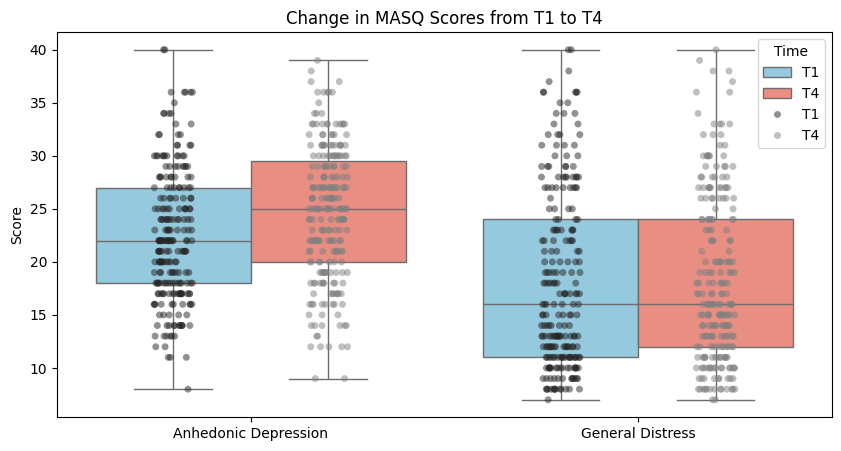

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data in long format for easier plotting
df_plot = df.melt(id_vars=[], 
                  value_vars=['MASQ_ANH_sum_T1', 'MASQ_ANH_sum_T4', 'MASQDG_sum_T1', 'MASQDG_sum_T4'],
                  var_name='Variable', value_name='Score')

# Create a new column for Time and Scale
df_plot['Time'] = df_plot['Variable'].apply(lambda x: 'T1' if x.endswith('_T1') else 'T4')
df_plot['Scale'] = df_plot['Variable'].apply(lambda x: 'Anhedonic Depression' if 'ANH' in x else 'General Distress')

# Plot
plt.figure(figsize=(10,5))
sns.boxplot(x='Scale', y='Score', hue='Time', data=df_plot, palette=['skyblue','salmon'])
sns.stripplot(x='Scale', y='Score', hue='Time', data=df_plot, 
              dodge=True, color='gray', alpha=0.5, jitter=True)

plt.title('Change in MASQ Scores from T1 to T4')
plt.ylabel('Score')
plt.xlabel('')
plt.legend(title='Time', loc='upper right')
plt.show()
